In [5]:
import pandas as pd

# JSON data
json_data = {
    "students": [
        {
            "id": "S001",
            "name": "John Doe",
            "grades": {
                "math": {"grade": { "grade":"A", "point":5}, "point": 5},
                "science": {"grade": "B", "point": 4},
                "history": {"grade": { "grade":{ "grade":"A", "point":5}, "point":5}, "point": 5},
                "english": {"grade": "A", "point": 5}
            }
        },
        {
            "id": "S002",
            "name": "Jane Smith",
            "grades": {
                "math": {"grade": "B", "point": 4},
                "science": {"grade": "A", "point": 5},
                "history": {"grade": "B", "point": 4},
                "english": {"grade": "A", "point": 5}
            }
        },
        {
            "id": "S003",
            "name": "Emily Johnson",
            "grades": {
                "math": {"grade": "C", "point": 3},
                "science": {"grade": "B", "point": 4},
                "history": {"grade": "C", "point": 3},
                "english": {"grade": "B", "point": 4}
            }
        }
    ]
}

# Normalize the data and create a DataFrame
df = pd.json_normalize(json_data, record_path=['students'])

df

,id,name,grades.math.grade,grades.math.point,grades.science.grade,grades.science.point,grades.history.grade,grades.history.point,grades.english.grade,grades.english.point
0,S001,John Doe,A,5,B,4,A,5,A,5
1,S002,Jane Smith,B,4,A,5,B,4,A,5
2,S003,Emily Johnson,C,3,B,4,C,3,B,4


In [17]:
import pandas as pd

# Python dictionary of students
students_dict = {
    "S001": {
        "name": "John Doe",
        "grades": {
            "math": "A",
            "science": "B",
            "history": "A",
            "english": "A"
        }
    },
    "S002": {
        "name": "Jane Smith",
        "grades": {
            "math": "B",
            "science": "A",
            "history": "B",
            "english": "A"
        }
    },
    "S003": {
        "name": "Emily Johnson",
        "grades": {
            "math": "C",
            "science": "B",
            "history": "C",
            "english": "B"
        }
    }
}

# Convert the nested dictionary to a DataFrame
# First, flatten the dictionary
data = []
for student_id, info in students_dict.items():
    data.append({
        "id": student_id,
        "name": info["name"],
        **info["grades"]
    })

# Create the DataFrame
df = pd.DataFrame(data)

# Set the index to the student ID
df.set_index('id', inplace=True)

df

,name,math,science,history,english
id,,,,,
S001,John Doe,A,B,A,A
S002,Jane Smith,B,A,B,A
S003,Emily Johnson,C,B,C,B


In [18]:
import pandas as pd

# Existing DataFrame
df = pd.DataFrame({
    'id': ['S001', 'S002', 'S003'],
    'name': ['John Doe', 'Jane Smith', 'Emily Johnson'],
    'math': ['A', 'B', 'C'],
    'science': ['B', 'A', 'B'],
    'history': ['A', 'B', 'C'],
    'english': ['A', 'A', 'B']
}).set_index('id')

# Define a mapping of grades to points
grade_points = {
    'A': 4,
    'B': 3,
    'C': 2,
    'D': 1,
    'F': 0
}

# Function to convert grades to points
def convert_to_points(grade):
    return grade_points.get(grade, 0)

# Apply the function to each grade column
for subject in ['math', 'science', 'history', 'english']:
    df[subject + '_points'] = df[subject].apply(convert_to_points)

df

,name,math,science,history,english,math_points,science_points,history_points,english_points
id,,,,,,,,,
S001,John Doe,A,B,A,A,4,3,4,4
S002,Jane Smith,B,A,B,A,3,4,3,4
S003,Emily Johnson,C,B,C,B,2,3,2,3


<Axes: >

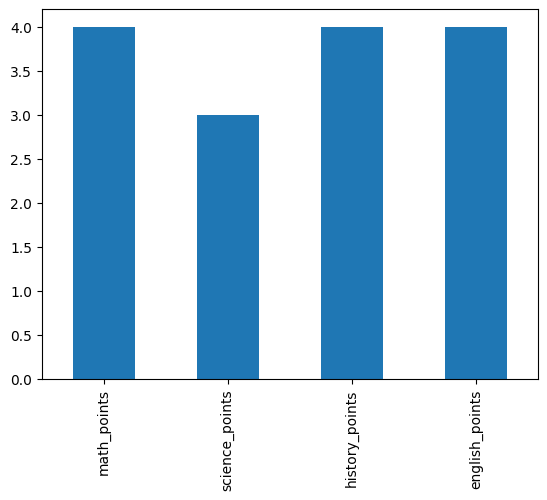

In [48]:
(df.loc[:,['math_points','science_points','history_points','english_points']]).plot.bar()

In [71]:
df.index.to_numpy(), df.math_points.to_numpy()


(array(['S001', 'S002', 'S003'], dtype=object), array([4, 3, 2]))

In [75]:
df.index.to_list(), df.math_points.to_list()

(['S001', 'S002', 'S003'], [4, 3, 2])

In [62]:
df[['math_points','science_points']].to_json()

'{"math_points":{"S001":4,"S002":3,"S003":2},"science_points":{"S001":3,"S002":4,"S003":3}}'

In [77]:
df[['math_points','science_points']].to_dict()

{'math_points': {'S001': 4, 'S002': 3, 'S003': 2},
 'science_points': {'S001': 3, 'S002': 4, 'S003': 3}}

<Axes: xlabel='id'>

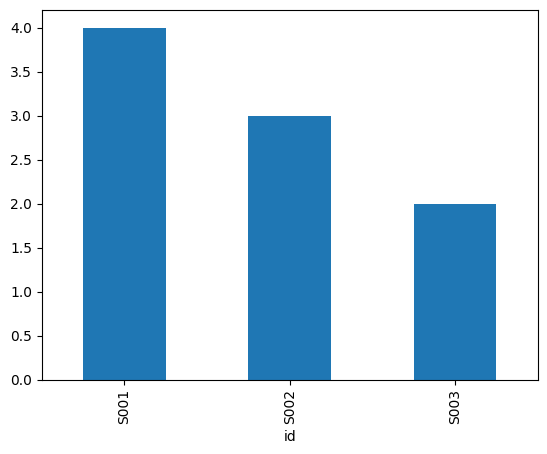

In [50]:
df.math_points.plot.bar()